### IMAGE CLASSIFICATION FOR FASHION DATASET USING VGG16

In [ ]:
from PIL import Image
import os, os.path
import cv2
import scipy.ndimage
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

After importing all the necessary libraries and modules, we load the image files found in the path below. 
The image files were cleaned by manually taking 5000 correct images from the big dataset. and mixed it with 1000 incorrect images for the particular class. This is to create a conducive environment for the model to train on smaller dataset, mimicking larger dataset.  
The reason why we use a smaller dataset is because we do not have the resources to train 600,000 images. 

In [ ]:
path="/Users/matthewhan/Desktop/NDSC/fashion_by_category_2" 

In [ ]:
# Storage for the image data.
image_list=[]
photos=[]
category_list=[]

We store image data in a numpy array of 0 to 1 representation because of limited RAM.

In [ ]:
for root, dirs, files in os.walk(path):
    for file in tqdm(files):
        try:
            if (file.endswith(".jpg") or file.endswith(".JPG")):
                image_file=os.path.join(root, file)
                image=cv2.imread(image_file, cv2.IMREAD_COLOR)
                image=cv2.resize(image, (32,32))
                image=np.array(image)/255
                photos.append(np.array(image))
                category_list.append(os.path.join(root,file).split("/")[-2])
        except:
                pass

In [ ]:
dataset=np.array(photos)
print(dataset.shape)
print("We also have",len(category_list),"number of categories")
print("We have a total of", len(dataset), "number of .jpg files")

We pickled the dataset so that we do not need to run the above all over again as it takes too much time.

In [ ]:
import pickle

with open('fashion_images_vgg16.pkl', 'wb') as f:
    pickle.dump([dataset, category_list], f)

In [1]:
import pickle
with open('fashion_images_vgg16.pkl', 'rb') as f:
    pickled_dataset, pickled_category_list = pickle.load(f)
    
print(pickled_dataset.shape)
print(len(pickled_category_list))

(81722, 32, 32, 3)
81722


In [2]:
from collections import Counter

print("The following are the categories:")
print(Counter(pickled_category_list).keys())
print("\nThe number of photos per categories are:")
print(Counter(pickled_category_list).values())

The following are the categories:
dict_keys(['20', '18', '27', '29', '28', '17', '19', '26', '21', '30', '24', '23', '22', '25'])

The number of photos per categories are:
dict_values([5358, 6070, 6071, 6006, 5909, 4100, 6134, 5828, 6093, 5990, 6109, 6004, 5972, 6078])


In [5]:
import pandas as pd

df=pd.DataFrame.from_dict(Counter(pickled_category_list), orient='index').reset_index().rename(columns={'index':'class', 0:'count'})
df['class']=pd.to_numeric(df['class'])
df.sort_values('class', inplace=True)
df

,class,count
5,17,4100
1,18,6070
6,19,6134
0,20,5358
8,21,6093
12,22,5972
11,23,6004
10,24,6109
13,25,6078
7,26,5828


In [6]:
# function to start the class number from 0
def minuser(x):
    return (x-17)
df['new_class'] = df['class'].apply(minuser)

In [7]:
df

,class,count,new_class
5,17,4100,0
1,18,6070,1
6,19,6134,2
0,20,5358,3
8,21,6093,4
12,22,5972,5
11,23,6004,6
10,24,6109,7
13,25,6078,8
7,26,5828,9


In [8]:
# There are a total of 14 classes
total_classes=['Others', 'Casual Dress', 'Party Dress', 'Maxi Dress', 
               'A Line Dress', 'Bodycon Dress', 'Wedding Dress', 
               'Big Size Dress', 'Tshirt', 'Blouse', 'Shirt', 'Tanktop', 
               'Crop Top', 'Big Size Top']
NUM_CLASSES=len(total_classes)
print(NUM_CLASSES)
print(type(total_classes[1]))

14
<class 'str'>


In [11]:
import numpy as np
new_category_list=[int(i)-17 for i in pickled_category_list]
#new_category_list.sort()
y=np.c_[np.array(new_category_list)]
print(y)

[[3]
 [3]
 [3]
 ...
 [8]
 [8]
 [8]]


#### Looking at the dataset

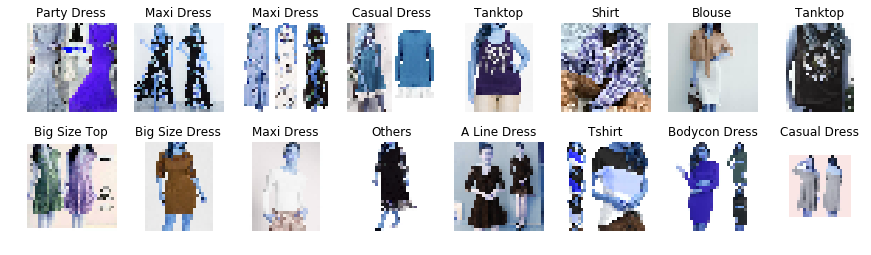

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

pickled_category_list_int=[int(i)-17 for i in pickled_category_list]
y=np.c_[np.array(pickled_category_list_int)]

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, y.shape[0])
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(pickled_dataset[random_index, :])
        ax.set_title(total_classes[y[random_index, 0]])

In [16]:
print(pickled_category_list[0])
print(pickled_category_list_int[0])

20
3


In [17]:
print(pickled_dataset.shape)
print(y.shape)

(81722, 32, 32, 3)
(81722, 1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pickled_dataset, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [19]:
# Keras_utils converts a class vector (integers) to binary class matrix for use with categorical_crossentropy.
import keras
import keras_utils

y_train2 = keras.utils.to_categorical(y_train, dtype='int')
y_val2 = keras.utils.to_categorical(y_val, dtype='int')
y_test2=keras.utils.to_categorical(y_test,dtype='int')

Using TensorFlow backend.


In [20]:
y_val2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

### Trying the VGG16 model.

In [21]:
import keras
from keras import backend
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [22]:
# for vgg16
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same',input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
              
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
            
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(14)) # There are 14 classes, therefore the last output layer has 14 neurons.
    model.add(Activation('softmax'))
    
    return model

In [23]:
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [24]:
# Use adam for vgg16
# run this
INIT_LR = 0.001  
BATCH_SIZE = 32
EPOCHS = 50

model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  #for multi-class label
    optimizer=keras.optimizers.adam(lr=INIT_LR),  
    metrics=['accuracy']  
)

In [25]:
print("X_train2: ", X_train.shape)
print("y_train2: ", y_train2.shape)
print("X_val2: ", X_val.shape)
print("y_val2: ", y_val2.shape)

X_train2:  (66194, 32, 32, 3)
y_train2:  (66194, 14)
X_val2:  (7355, 32, 32, 3)
y_val2:  (7355, 14)


In [26]:
history=model.fit(
    X_train, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val2),
    shuffle=True,
    verbose=2
)

Train on 66194 samples, validate on 7355 samples
Epoch 1/50
 - 196s - loss: 1.9918 - acc: 0.3758 - val_loss: 1.2441 - val_acc: 0.6601
Epoch 2/50
 - 195s - loss: 1.2748 - acc: 0.6388 - val_loss: 0.8939 - val_acc: 0.7716
Epoch 3/50
 - 195s - loss: 1.0472 - acc: 0.7144 - val_loss: 0.7602 - val_acc: 0.8092
Epoch 4/50
 - 195s - loss: 0.9448 - acc: 0.7433 - val_loss: 0.7017 - val_acc: 0.8218
Epoch 5/50
 - 196s - loss: 0.8825 - acc: 0.7592 - val_loss: 0.6698 - val_acc: 0.8258
Epoch 6/50
 - 197s - loss: 0.8443 - acc: 0.7702 - val_loss: 0.6506 - val_acc: 0.8292
Epoch 7/50
 - 198s - loss: 0.8162 - acc: 0.7777 - val_loss: 0.6449 - val_acc: 0.8249
Epoch 8/50
 - 184s - loss: 0.7907 - acc: 0.7835 - val_loss: 0.6201 - val_acc: 0.8303
Epoch 9/50
 - 190s - loss: 0.7700 - acc: 0.7882 - val_loss: 0.6155 - val_acc: 0.8332
Epoch 10/50
 - 190s - loss: 0.7589 - acc: 0.7917 - val_loss: 0.6094 - val_acc: 0.8329
Epoch 11/50
 - 194s - loss: 0.7451 - acc: 0.7957 - val_loss: 0.6016 - val_acc: 0.8351
Epoch 12/50
 -

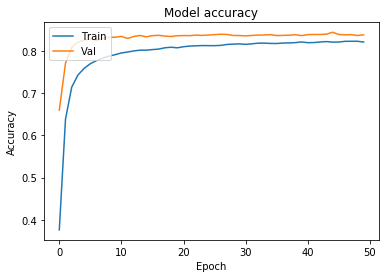

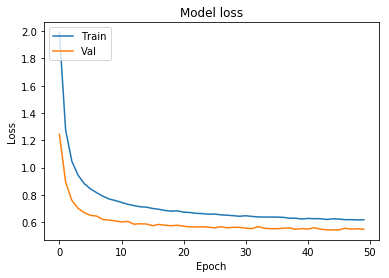

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
# Save weights of the training to replicate the same trained model on the unsampled dataset.
model.save_weights('fashion_vgg16_weights.h5')

# Test Prediction

In [29]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2

In [30]:
test=pd.read_csv('./ndsc_dataset/test.csv')

In [31]:
test['Full Category'], test['Filename'] = test['image_path'].str.split('/', 1).str
test.drop('image_path', axis=1, inplace=True)
print("There are a total of ", test.shape[0], "items in the test dataset")

There are a total of  172402 items in the test dataset


Filter out the fashion images from the test file. Repeat the procedure for test images to match the name of the picture in test.csv with the image dataset. 

In [32]:
test_fashion=test[test['Full Category']=='fashion_image']

In [33]:
import os, os.path
from tqdm import tqdm

path="/Users/matthewhan/Desktop/NDSC/dest_test" 

image_list=[]
photos=[]

for file in tqdm(os.listdir(path)):
    try:
        if (file.endswith(".jpg") or file.endswith(".JPG")):
            image_file=os.path.join(path,file)
            image=cv2.imread(image_file, cv2.IMREAD_COLOR)
            image=cv2.resize(image, (32,32))
            image=(np.array(image))/255
            photos.append(np.array(image))
            image_list.append(image_file.split("/")[-1])
                
  
    except:
        pass
                

dataset=np.array(photos)
print(dataset.shape)

print("We also have",len(image_list),"number of files")
print("We have a total of", len(dataset), "number of .jpg files")

100%|██████████| 55440/55440 [32:40<00:00, 28.27it/s]  


(55440, 32, 32, 3)
We also have 55440 number of files
We have a total of 55440 number of .jpg files


In [34]:
image_list

['a2cead78cbd4330852d9e157fedbf80a.jpg',
 '95bb39a5bf6a514fe7f8fc045e68625e.jpg',
 '4fbdf295791c46332f6910c3b7474f99.jpg',
 '91fe03b4a31c5fd4ff2c66ad3e333081.jpg',
 'b20b687acac7898a9c3aad072d43a642.jpg',
 '495c2b5536f13d376d223bbc5f60d80e.jpg',
 '2d7266e52e984498d866ed936d7367b1.jpg',
 '16535035577cffa427df9cda259ca012.jpg',
 '10a5b8375ed9db9fa6360b9fb294befd.jpg',
 'c1eac8ea72686f476e7d452616a0d547.jpg',
 'c89389213fb44134ed4f719a2cf6d709.jpg',
 '7a4a3aaa7719d5e835c8fc8193bd21ac.jpg',
 '8e8c356909a0c25cf5fb2c88e3a5666c.jpg',
 '08d46ecbda7b067d7f37c21d1e46ab68.jpg',
 'a874426ec8b64aee4cbf87a9310bcdfe.jpg',
 '8c21bcc409f8a2809354955cc4c2617b.jpg',
 '39a3a4925b1c07da94dac6c47fc93132.jpg',
 'cecf6b94916afc08e7d7e7febd157a5d.jpg',
 '113b6ad390705144d39a31f3afbc9590.jpg',
 '53fc56acd4ad025b89c9a2352fefd8f6.jpg',
 '032982e1acf96fe288d089cdfc076875.jpg',
 '599ea30f1fd3d1039d481e80da7f4e22.jpg',
 '205485feca3ae52434209d10fe3f5329.jpg',
 'ed051768a6660d4567d379a2c5a651d6.jpg',
 'b5aa157b1bd4a8

Pickling the test images so that we don't need to run the above extraction codes again.

In [35]:
import pickle

with open('fashion_test_vgg16_images.pkl', 'wb') as f:
    pickle.dump([dataset, image_list], f)

In [36]:
import pickle
with open('fashion_test_vgg16_images.pkl', 'rb') as f:
    pickled_dataset, pickled_image_list = pickle.load(f)
    
print(pickled_dataset.shape)
print(len(pickled_image_list))

(55440, 32, 32, 3)
55440


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
image_filename=pd.DataFrame(pickled_image_list).rename(columns={0:'Filename'})
image_filename

,Filename
0,a2cead78cbd4330852d9e157fedbf80a.jpg
1,95bb39a5bf6a514fe7f8fc045e68625e.jpg
2,4fbdf295791c46332f6910c3b7474f99.jpg
3,91fe03b4a31c5fd4ff2c66ad3e333081.jpg
4,b20b687acac7898a9c3aad072d43a642.jpg
5,495c2b5536f13d376d223bbc5f60d80e.jpg
6,2d7266e52e984498d866ed936d7367b1.jpg
7,16535035577cffa427df9cda259ca012.jpg
8,10a5b8375ed9db9fa6360b9fb294befd.jpg
9,c1eac8ea72686f476e7d452616a0d547.jpg


In [39]:
fashion_test_img=pd.merge(test_fashion, image_filename, on=['Filename'], how='left')
fashion_test_img

,itemid,title,Full Category,Filename
0,670968580,women casual o neck long sleeve lace patchwork...,fashion_image,b0ca9645c5c3527882d935f17b4c9579.jpg
1,475599610,zaful long dress vintage wanita v neck lengan ...,fashion_image,c74af2636e9fe2686981decce3ca5b6c.jpg
2,1652671018,dress skater swing o neck tanpa lengan desain ...,fashion_image,1f2a2d91f5eb2d80f1dfdcf0b1f50169.jpg
3,1705634904,ok dress slim sexy deep v neck lengan panjang ...,fashion_image,fdb6309635ebb5eac5df9c61984ffce5.jpg
4,1789421087,noa korean lace embroidery womens crew neck lo...,fashion_image,578e5c74e97128cd25378ef0f0c021cf.jpg
5,1818944472,vintage women christmas lace patchwork o neck ...,fashion_image,dde2d4b3626a6924ea612d32315a5797.jpg
6,1341150340,ready stock dress v neck tanpa lengan desain p...,fashion_image,d951fbeb548a5a5a2a307b56aa791bfa.jpg
7,1021592916,women patchwork long sleeve lace o neck beach ...,fashion_image,4a5fe5c2019b4e466e843dbbe011ef4b.jpg
8,1252778162,fashion wanita dress bodycon bandage pensil la...,fashion_image,aefb671d09d8ad9004c37103d0f9e4a3.jpg
9,1309386587,fashion bohemian women lady dress chiffon chro...,fashion_image,52a94a1c04a1f8b6b30f737521d20fdc.jpg


In [40]:
fashion_test_img2=pd.merge(image_filename,test_fashion, on=['Filename'], how='left')
fashion_test_img2

,Filename,itemid,title,Full Category
0,a2cead78cbd4330852d9e157fedbf80a.jpg,1366864936,blus off shoulder sabrina lengan panjang lotus...,fashion_image
1,95bb39a5bf6a514fe7f8fc045e68625e.jpg,809354112,import blouse atasan glossy silk tanpa lengan ...,fashion_image
2,4fbdf295791c46332f6910c3b7474f99.jpg,1616676143,sweater wanita lengan panjang dengan bahan vel...,fashion_image
3,91fe03b4a31c5fd4ff2c66ad3e333081.jpg,1814868626,mybigmall women chiffon long sleeve loose v ne...,fashion_image
4,b20b687acac7898a9c3aad072d43a642.jpg,1238106448,w.a setelan blus crop top off shoulder lengan ...,fashion_image
5,495c2b5536f13d376d223bbc5f60d80e.jpg,1032191389,2018 new korean style solid color embroidered ...,fashion_image
6,2d7266e52e984498d866ed936d7367b1.jpg,851061742,blus tunik pullover lengan pendek hem asimetri...,fashion_image
7,16535035577cffa427df9cda259ca012.jpg,828513967,musim semi gugur wanita casual vintage loose l...,fashion_image
8,10a5b8375ed9db9fa6360b9fb294befd.jpg,1589827625,wholesale white shirt grosir kemeja katun puti...,fashion_image
9,c1eac8ea72686f476e7d452616a0d547.jpg,474414987,blus sifon v neck cold shoulder strappy lengan...,fashion_image


In [41]:
item_id=list(fashion_test_img2['itemid'])
item_id

[1366864936,
 809354112,
 1616676143,
 1814868626,
 1238106448,
 1032191389,
 851061742,
 828513967,
 1589827625,
 474414987,
 1643984325,
 1664895376,
 927263769,
 1287003241,
 1713271504,
 1138225086,
 1819832751,
 610612292,
 1305663146,
 1313538055,
 1186849019,
 1763188933,
 959074272,
 1672922121,
 1041757780,
 1464370050,
 1628938061,
 1771503998,
 631232198,
 1092293609,
 79496212,
 1799477555,
 1761192997,
 970502376,
 1784671475,
 1762550845,
 1124377941,
 1288079323,
 1467150035,
 1734096655,
 1118077671,
 1649795270,
 1654335782,
 1462332848,
 1584096970,
 1449944883,
 1656980226,
 1785510763,
 1021380041,
 1603736896,
 1622243614,
 651254116,
 1575533337,
 1589283031,
 1340765288,
 1681559341,
 1236195604,
 1695561854,
 1474858704,
 1775292167,
 699298416,
 1561954526,
 1260675614,
 1687614633,
 1812826256,
 1371344614,
 907382147,
 1138461109,
 1111496826,
 1460974126,
 916015949,
 83895646,
 1105763283,
 664293287,
 1667015484,
 657454444,
 955050995,
 1330430046,
 35901

Repeat setting up the VGG16 model for the test set.

In [42]:
import keras
import keras_utils
import keras
from keras import backend
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras_tqdm import TQDMNotebookCallback

In [43]:
# for vgg16
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same',input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
              
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
            
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(14))
    model.add(Activation('softmax'))
    
    return model

In [44]:
INIT_LR = 0.001  
BATCH_SIZE = 32
EPOCHS = 50

model = make_model()

model.compile(
    loss='categorical_crossentropy',  
    optimizer=keras.optimizers.adam(lr=INIT_LR),  
    metrics=['accuracy']  
)

Below returns a compiled model identical to the previous one.

In [45]:
from keras.models import load_model

model.load_weights('fashion_vgg16_weights.h5')

In [46]:
prediction=model.predict(pickled_dataset)
prediction

array([[1.5637516e-04, 1.9085896e-01, 2.9801219e-04, ..., 3.3138874e-03,
        6.4193380e-01, 8.2724147e-02],
       [3.0956860e-05, 2.9970231e-03, 1.3733139e-03, ..., 4.9174759e-01,
        4.2024490e-01, 2.9868094e-04],
       [3.0319463e-02, 3.3597830e-01, 1.0364208e-02, ..., 4.5700543e-02,
        3.4730397e-02, 9.9196084e-02],
       ...,
       [7.2307201e-05, 8.9808416e-01, 1.6635447e-03, ..., 3.7254984e-03,
        1.3443611e-03, 2.5571886e-04],
       [2.4536252e-03, 1.9237754e-01, 2.5221942e-02, ..., 7.0555538e-02,
        2.3996036e-02, 5.3590443e-02],
       [1.3934722e-03, 7.2870195e-01, 3.6925471e-03, ..., 3.0593364e-03,
        7.9711191e-03, 2.5154641e-03]], dtype=float32)

In [47]:
test_classes = prediction.argmax(axis=-1)
list(test_classes)

[12,
 11,
 1,
 8,
 5,
 5,
 1,
 8,
 8,
 2,
 1,
 5,
 12,
 1,
 8,
 1,
 2,
 3,
 1,
 11,
 7,
 1,
 1,
 9,
 8,
 1,
 9,
 10,
 7,
 7,
 9,
 1,
 9,
 6,
 12,
 2,
 1,
 9,
 1,
 11,
 8,
 12,
 8,
 12,
 8,
 1,
 1,
 1,
 10,
 10,
 1,
 7,
 8,
 9,
 7,
 12,
 12,
 3,
 12,
 12,
 10,
 11,
 8,
 9,
 1,
 13,
 9,
 4,
 1,
 8,
 10,
 1,
 8,
 12,
 6,
 1,
 2,
 8,
 8,
 12,
 1,
 1,
 2,
 1,
 1,
 7,
 8,
 8,
 12,
 11,
 9,
 4,
 9,
 12,
 8,
 1,
 8,
 6,
 11,
 8,
 10,
 9,
 4,
 7,
 9,
 8,
 1,
 12,
 8,
 1,
 5,
 4,
 12,
 8,
 4,
 2,
 1,
 8,
 9,
 8,
 1,
 2,
 13,
 1,
 12,
 11,
 8,
 2,
 8,
 9,
 1,
 11,
 10,
 1,
 2,
 8,
 9,
 11,
 12,
 1,
 9,
 8,
 5,
 1,
 11,
 8,
 9,
 1,
 5,
 12,
 10,
 12,
 12,
 1,
 10,
 12,
 13,
 12,
 1,
 11,
 1,
 1,
 10,
 8,
 11,
 1,
 7,
 12,
 9,
 1,
 8,
 8,
 9,
 2,
 10,
 8,
 8,
 8,
 1,
 8,
 12,
 7,
 10,
 11,
 2,
 0,
 1,
 0,
 11,
 12,
 4,
 8,
 8,
 3,
 1,
 1,
 8,
 9,
 8,
 8,
 1,
 8,
 8,
 12,
 1,
 2,
 1,
 1,
 1,
 8,
 9,
 1,
 2,
 4,
 0,
 8,
 1,
 8,
 1,
 9,
 8,
 9,
 1,
 9,
 8,
 1,
 1,
 1,
 5,
 10,
 12,
 8,
 2,
 12,
 9,
 9

In [48]:
# Display the predicted results in a Dataframe

fashion_results = pd.DataFrame({'itemid': item_id, 'Category': test_classes})
fashion_results

,itemid,Category
0,1366864936,12
1,809354112,11
2,1616676143,1
3,1814868626,8
4,1238106448,5
5,1032191389,5
6,851061742,1
7,828513967,8
8,1589827625,8
9,474414987,2


In [49]:
# This function revert the class number back to the original class number.
def pluser(x):
    return (x+17)
fashion_results['new_class'] = fashion_results['Category'].apply(pluser)

fashion_results

,itemid,Category,new_class
0,1366864936,12,29
1,809354112,11,28
2,1616676143,1,18
3,1814868626,8,25
4,1238106448,5,22
5,1032191389,5,22
6,851061742,1,18
7,828513967,8,25
8,1589827625,8,25
9,474414987,2,19


A quick check of the predicted shows the image at position [1] is truly a tanktop

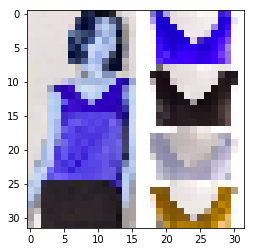

In [53]:
plt.imshow(pickled_dataset[1])

In [51]:
fashion_prediction_results = fashion_results.drop(columns="Category")
fashion_prediction_results.rename(columns={"new_class": "Category"}, inplace=True) 
fashion_prediction_results

,itemid,Category
0,1366864936,29
1,809354112,28
2,1616676143,18
3,1814868626,25
4,1238106448,22
5,1032191389,22
6,851061742,18
7,828513967,25
8,1589827625,25
9,474414987,19


In [54]:
# export the predicted result to csv
fashion_prediction_results.to_csv('/Users/matthewhan/Desktop/NDSC/ndsc_dataset/fashion_prediction.csv')